In [1]:
from automorphisms import *
from magma_interface import qec_code_auts_from_magma_with_intersection
from ZX_dualities import *
from XY_dualities import *
from utils.qec import *
from utils.qiskit import *
import pickle

# [[5,1,3]] - 5 qubit perfect code

$$S = \langle XZZXI, IXZZX, XIXZZ, ZXIXZ \rangle$$

In [2]:
n = 5
k = 1
d = 3
stabs = ['XZZXI','IXZZX','XIXZZ','ZXIXZ']
H_symp = stabs_to_H_symp(stabs)
G,LX,LZ,D = compute_standard_form(H_symp)

# SH circuit

In [3]:
code_auts_dict = qec_code_auts_from_magma_with_intersection(n,k,d,H_symp).run(fileroot='./auts_data/')
filename = f'./auts_data/auts_n{n}k{k}d{d}.pkl'
with open(filename, 'rb') as f:
    code_auts_dict = pickle.load(f)
print('Aut Group Order: ', code_auts_dict['order'])
print('Time: ', code_auts_dict['time'])
print('No of aut gens: ', len(code_auts_dict['auts']))

Aut Group Order:  360
Time:  0.01
No of aut gens:  6


In [4]:
auts = code_auts_dict['auts']
aut = auts[2]
phys_act = circ_from_aut(H_symp,aut)        
phys_circ, _ = phys_act.circ()
act = logical_circ_and_pauli_correct(H_symp,phys_circ)
circ = act.run()

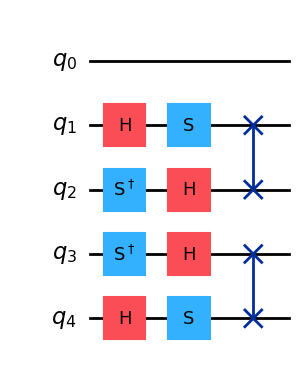

In [5]:
qc = construct_circuit(circ[1], n)
qc.draw(output='mpl')

# H circuit

In [6]:
# code_auts_dict = qec_code_ZX_dualities_from_magma_with_intersection(n,k,d,H_symp).run(fileroot='./auts_data/')
filename = f'./auts_data/ZX_dualities_n{n}k{k}d{d}.pkl'
with open(filename, 'rb') as f:
    code_auts_dict = pickle.load(f)
print('Aut Group Order: ', code_auts_dict['order'])
print('Time: ', code_auts_dict['time'])
print('No of aut gens: ', len(code_auts_dict['auts']))

Aut Group Order:  20
Time:  0.01
No of aut gens:  3


In [7]:
auts = code_auts_dict['auts']
aut = auts[1]
phys_act = circ_from_ZX_duality(H_symp,aut)        
phys_circ, _ = phys_act.circ()
act = logical_circ_and_pauli_correct(H_symp,phys_circ)
circ = act.run()

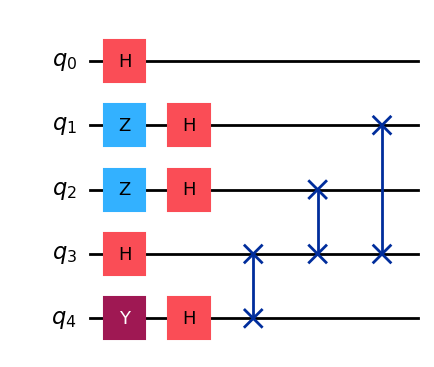

In [8]:
qc = construct_circuit(circ[1], n)
qc.draw(output='mpl')

# S circuit

In [9]:
# code_auts_dict = qec_code_XY_dualities_from_magma_with_intersection(n,k,d,H_symp).run(fileroot='./auts_data/')
filename = f'./auts_data/XY_dualities_n{n}k{k}d{d}.pkl'
with open(filename, 'rb') as f:
    code_auts_dict = pickle.load(f)
print('Aut Group Order: ', code_auts_dict['order'])
print('Time: ', code_auts_dict['time'])
print('No of aut gens: ', len(code_auts_dict['auts']))

Aut Group Order:  20
Time:  0.01
No of aut gens:  3


In [10]:
auts = code_auts_dict['auts']
aut = auts[1]
phys_act = circ_from_XY_duality(H_symp,aut)        
phys_circ, _ = phys_act.circ()
act = logical_circ_and_pauli_correct(H_symp,phys_circ)
circ = act.run()

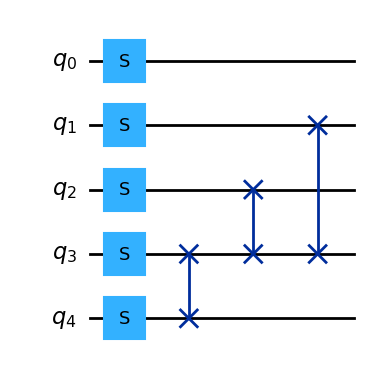

In [11]:
qc = construct_circuit(circ[1], n)
qc.draw(output='mpl')